# Scikit-Learn

## Introduction to Scikit-Learn

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we are going to cover :

 0. An end to end sklearn workflow
 1. Getting the data ready
 2. choose the right estimator/algorithm for our problems
 3. Fit the model/algorithm and use to make predictions
 4. Evaluation and improvement
 5. Save and load the trained model
 6. Putting it all together


### 0. An end to end Scikit-learn work flow


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. get the data ready

import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# creating feature matrix
x= heart_disease.drop("target",axis=1)

# creating label matrix
y= heart_disease["target"]

In [4]:
# 2 . choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train , x_test , y_train  , y_test = train_test_split(x,y,test_size = 0.2)
type(y_test)

pandas.core.series.Series

In [6]:
clf.fit(x_train , y_train)

RandomForestClassifier()

In [7]:
# make a prediction
import numpy as np
y_label = clf.predict(x_test)

In [8]:
y_label

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
y_test

98     1
120    1
184    0
52     1
97     1
      ..
43     1
140    1
24     1
75     1
20     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model
clf.score(x_train , y_train)

1.0

In [11]:
clf.score(x_test , y_test)

0.819672131147541

In [12]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test , y_label))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.91      0.80      0.85        40

    accuracy                           0.82        61
   macro avg       0.80      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61



In [13]:
confusion_matrix(y_test , y_label)

array([[18,  3],
       [ 8, 32]])

In [14]:
accuracy_score(y_test , y_label)

0.819672131147541

In [15]:
# 4.2 Improve the model 
# Try different amount of estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f" Trying model with {i} estimators..." )
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test , y_pred ))
    

 Trying model with 10 estimators...
0.7540983606557377
 Trying model with 20 estimators...
0.8360655737704918
 Trying model with 30 estimators...
0.8360655737704918
 Trying model with 40 estimators...
0.8032786885245902
 Trying model with 50 estimators...
0.8360655737704918
 Trying model with 60 estimators...
0.8360655737704918
 Trying model with 70 estimators...
0.819672131147541
 Trying model with 80 estimators...
0.819672131147541
 Trying model with 90 estimators...
0.819672131147541


In [16]:
# 5 . Save a model and load it

import pickle 

pickle.dump(clf , open("randomforest1.pkl" , "wb"))

In [17]:
loaded_model = pickle.load(open("randomforest1.pkl", "rb"))
loaded_model.score(x_test , y_test)

0.819672131147541

## Getting the data ready to be used with machine learning 

Three main things we have to do :
 - Split the data into features and labels
 - Filling ( or so called imputing) or disregarding missing values
 - converting non numerical to numerical data ( feature encoding)


In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
 # split the data into training and test set
from sklearn.model_selection import train_test_split

x_train , x_test , y_train  , y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

#### Make sure its all numerical

In [22]:
carsales = pd.read_csv("car-sales-extended-missing-data.csv")
carsales.head()
# Split the data 
x = carsales.drop("Price" , axis =1)
y = carsales["Price"]
type(y)


pandas.core.series.Series

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour", "Doors"]
one_hot  = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

x_trans = transformer.fit_transform(x).toarray() # it return scipy matrix so conversion is must
type(x_trans)

numpy.ndarray

In [24]:
x_trans = pd.DataFrame((x_trans))


In [25]:
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
#pd.get_dummies(carsales[["make" ,"colour" , "doors"]]) # can also work for encoding


#removing nan values and infinities
x_trans = pd.DataFrame(x_trans).fillna(x_trans.mean(numeric_only=True))
y = y.fillna(y.mean(numeric_only=True))

# refitting
reg = RandomForestRegressor(n_estimators=100)
x_train , x_test , y_train  , y_test = train_test_split(x_trans,y,test_size = 0.2)
type(x_train) , type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [28]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
np.any(np.isnan(x_trans))

False

In [30]:
reg.score(x_test , y_test)

0.19084197431676708

In [31]:
len(x_trans)

1000

In [32]:
import sklearn 
print(sklearn.__version__)

1.4.2


In [33]:
# to get no of missing entries
carsales.isna().sum() , x_train.isna().sum()

(Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 dtype: int64)

In [34]:
# another way to remove missing , just more proffesional

'''
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy = "constant" , fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant" , fill_value = 4)
num_imputer = SimpleImputer(stategy = "mean")

cat = ["make' , 'colour']
door = ['doors']
num = [Odometer (km)]

imputer = ColumnTransformer([
                ("cat" , cat_imputer , cat),
                ("door" , door_imputer , door),
                ("num" , num_imputer , num)])

filled_x = imputer.fit_transform(x)
''';

## How to find the best model???? 😩

### 2. choosing the right estimator/algorithm for your problem
Some things to note:
    - Sklearn refers to machine learning models, algorithms as estimators
    - classification problem - predicting a category
    - regression problem - predicting a number

In [35]:
!jupyter --version

/Users/swayamsingal/.zshenv:.:1: no such file or directory: /Users/swayamsingal/.cargo/env
Selected Jupyter core packages...
IPython          : 8.25.0
ipykernel        : 6.28.0
ipywidgets       : 8.1.2
jupyter_client   : 8.6.0
jupyter_core     : 5.7.2
jupyter_server   : 2.14.1
jupyterlab       : 4.2.4
nbclient         : 0.8.0
nbconvert        : 7.10.0
nbformat         : 5.9.2
notebook         : 7.2.1
qtconsole        : 5.5.1
traitlets        : 5.14.3


In [36]:
!python --version

/Users/swayamsingal/.zshenv:.:1: no such file or directory: /Users/swayamsingal/.cargo/env
Python 3.11.9


## lets use the california housing dataset 

In [37]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [38]:
housing_df = pd.DataFrame(housing["data"] , columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [39]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
x = housing_df.drop('MedHouseVal' , axis=1)
y= housing_df['MedHouseVal']

In [41]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [43]:
np.random.seed(42)
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [44]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train , y_train)

Ridge()

In [45]:
model.score(x_test , y_test)

0.5758549611440126

In [46]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(x_train , y_train)
reg.score(x_test , y_test)

0.8059809073051385

In [47]:
y_preds = reg.predict(x_test)
y_preds

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [48]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(x_train , y_train)
reg.score(x_test , y_test)
reg.predict(x_test)

array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.071  ])

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

0.3270458119670544

## now for the classification problem 

In [50]:
heart = pd.read_csv('heart-disease.csv')

In [51]:
from sklearn.svm import LinearSVC

clf = LinearSVC(dual="auto")
np.random.seed(42)
x= heart.drop("target",axis = 1)
y=heart['target']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.8688524590163934

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
np.random.seed(42)
x= heart.drop("target",axis = 1)
y=heart['target']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train , y_train)
clf.score(x_test , y_test)


0.8524590163934426

if u have structured data , use ensemble , otherwise use deep or transfer learning

### Make predictions 

2 ways :
- predict()
- predict_proba()

In [53]:
y_preds =clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [54]:
np.mean(y_preds == y_test)

0.8524590163934426

In [55]:
clf.score(x_test , y_test)

0.8524590163934426

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_preds)

0.8524590163934426

In [57]:
# make predictions with predict_proba
#predict probability returns probablity estimates

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [58]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

## Three ways to evaluate machine learning model

 - Estimator's built in score()
 - scoring parameter
 - problem specific metrics

In [59]:
# score() done above 
from sklearn.svm import LinearSVC

clf = LinearSVC(dual="auto")
np.random.seed(42)
x= heart.drop("target",axis = 1)
y=heart['target']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train , y_train)
clf.score(x_test , y_test)
# highest is 1.0 and lowest is 0.0

0.8688524590163934

In [60]:
clf.score(x_train, y_train)

0.8553719008264463

In [61]:
from sklearn.ensemble import RandomForestRegressor

x = housing_df.drop('MedHouseVal' , axis=1)
y= housing_df['MedHouseVal']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

reg = RandomForestRegressor(n_estimators =100)
reg.fit(x_train , y_train)
reg.score(x_test , y_test)

0.8106824128529077

#### scoring

In [62]:
from sklearn.model_selection import cross_val_score
# score() done above 
from sklearn.svm import LinearSVC

clf = LinearSVC(dual="auto")
np.random.seed(42)
x= heart.drop("target",axis = 1)
y=heart['target']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train , y_train)
cross_val_score(clf,x,y)
# highest is 1.0 and lowest is 0.0

array([0.81967213, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [63]:
#cross validation splits 20 percent , n times uniquely sets are split . n=5 by default . could be changed by changing the parameter cv

In [64]:
np.random.seed(42)
clf_single_score = clf.score(x_test , y_test)
clf_cross_val = np.mean(cross_val_score(clf, x,y,cv=6))

clf_cross_val , clf_cross_val
# still cross validation is preffered

(0.8215032679738562, 0.8215032679738562)

In [65]:
np.mean(cross_val_score(clf, x,y,cv=6 , scoring = None))
#defualt scoring parameter is mean accuracy

0.8215032679738562

### classification model evaluation
 - accuracy
 - Area under ROC curve
 - confusion matrix
 - Classification report

### accuracy

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
np.random.seed(42)
x= heart.drop("target",axis = 1)
y=heart['target']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train , y_train)
clf_cross_val = np.mean(cross_val_score(clf, x,y,cv=6))

In [67]:
np.mean(clf_cross_val)

0.7852287581699348

In [68]:
print(f"heart disease classifier cross value scroe accuracy : {np.mean(clf_cross_val)*100:.2f}%")

heart disease classifier cross value scroe accuracy : 78.52%


### area under roc curve

ROC curves are a comparison of a model's true positive rate vs a model's false positive rate 

- True Positive = model predicts 1 when truth is 1
- false Positive = model predicts 1 when truth is 0
- True negative = model prodicts 0 when truth is 0
- False Negative = model predicts 0 when truth is 1


In [69]:
from sklearn.metrics import roc_auc_score , roc_curve
y_probs = clf.predict_proba(x_test)

y_probs_pos = y_probs[: , 1]
y_probs_pos

array([0.1, 0.5, 0.6, 0.1, 0.9, 0.7, 0.8, 0. , 0.1, 0.7, 0.5, 0.4, 0.8,
       0. , 1. , 1. , 1. , 0.1, 0.1, 0. , 0.4, 0. , 0.6, 0.6, 0.7, 0.8,
       0.8, 0.7, 0. , 0.7, 0.1, 0.1, 0. , 0.4, 0.5, 0. , 0.9, 1. , 0.7,
       1. , 1. , 0.9, 0.9, 0.8, 0.7, 0.3, 0.5, 1. , 0.2, 0.2, 0. , 0.2,
       0.9, 0.7, 0.1, 0. , 0.2, 1. , 0. , 0. , 0.1])

In [70]:
fpr, tpr , thresholds = roc_curve(y_test , y_probs_pos)

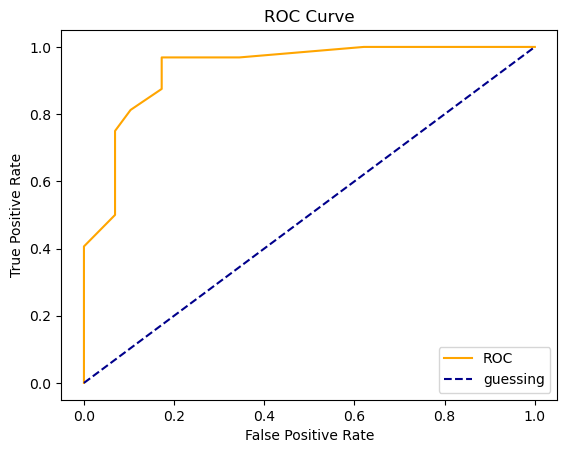

In [71]:
# create a fuction for plotting roc curves

def plot_curve(fpr , tpr):
    plt.plot(fpr, tpr , color = "orange" , label = "ROC")
    plt.plot([0,1],[0,1],color = "darkblue" , linestyle = "--" , label = "guessing")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
plot_curve(fpr, tpr)

In [72]:
roc_auc_score(y_test , y_probs_pos) # only binary classification models

0.9342672413793104

### Confusion matrix

a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

in essence, giving you an idea of where the model is getting confused

In [73]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test , y_preds)

array([[26,  3],
       [ 6, 26]])

In [75]:
pd.crosstab(y_test ,
            y_preds,
            rownames = ["actual labels"],
            colnames = ["predicted labels"]
                        )

predicted labels,0,1
actual labels,,
0,26,3
1,6,26


In [81]:
import sys 
!conda install --yes seaborn

/Users/swayamsingal/.zshenv:.:1: no such file or directory: /Users/swayamsingal/.cargo/env
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/swayamsingal/anaconda3

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.13.2-py311hca03da5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done


<Axes: >

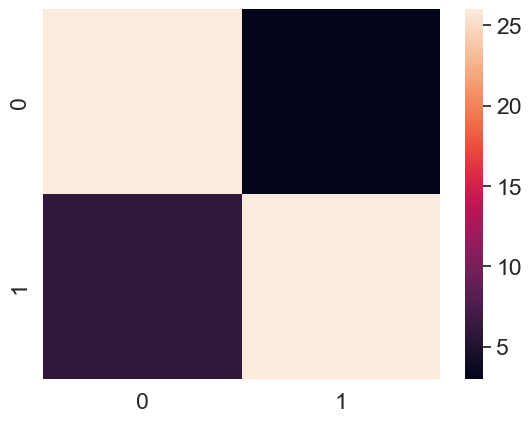

In [83]:
# 9 false  , 3 false negatives  , 6 false positives 
# make our confusion matrix with seaborn heatmap

import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test , y_preds)

sns.heatmap(conf_mat)
#confusion matrix can be as big as possible

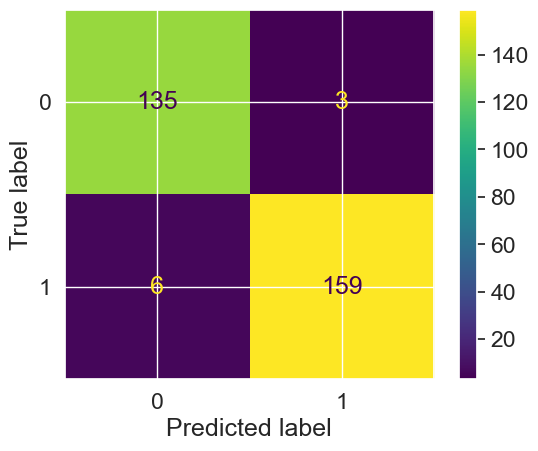

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf , X=x , y=y)

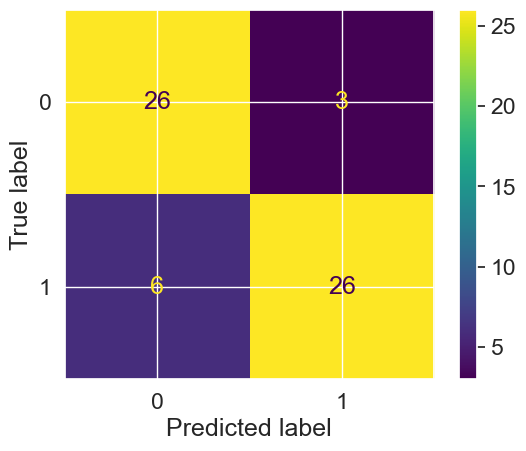

In [86]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test , 
                                        y_pred=y_preds)

### Classification labels


In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [96]:
# where precision and recall become valuable 

disease_true = np.zeros(10000)
disease_true[0]=1

disease_preds = np.zeros(10000)


pd.DataFrame(classification_report(disease_true , disease_preds , output_dict= True))

/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Evaluating Regression model

three ways 
- r2
- mae
- mse

### r2 score
coefficient of determination 


In [97]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing_df.drop('MedHouseVal' , axis=1)
y= housing_df['MedHouseVal']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

reg = RandomForestRegressor(n_estimators =100)
reg.fit(x_train , y_train)
reg.score(x_test , y_test)

0.8059809073051385

In [98]:
# r2 can be from -1 to 1
from sklearn.metrics import r2_score

r2_score(y_test , reg.predict(x_test))

0.8059809073051385

In [99]:
y_testmean = np.full(len(y_test), y_test.mean())

In [100]:
r2_score(y_test , y_testmean)

0.0

### mean absolute and mean square error

- mean abs = avg of abs differences between predictions and actual value
- mean square = Mean squared error regression loss.

In [103]:

#how wrong our predictions are
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test , reg.predict(x_test)) , mean_squared_error(y_test , reg.predict(x_test))

(0.3270458119670544, 0.2542443610174998)

#### finally using the scoring parameter

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
np.random.seed(42)
x= heart.drop("target",axis = 1)
y=heart['target']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train , y_train)
clf_cross_val = np.mean(cross_val_score(clf, x,y,cv=6 , scoring=None))


In [105]:
clf_cross_val

0.7852287581699348

In [107]:
np.mean(cross_val_score(clf, x,y,cv=6 , scoring="accuracy"))

0.8015032679738562

In [108]:
cv_precision = cross_val_score(clf, x , y, cv=5 , scoring="precision")

In [109]:
np.mean(cv_precision)

0.8164084606677987

In [110]:
cv_recall = cross_val_score(clf, x , y, cv=5 , scoring="recall")
np.mean(cv_recall)

0.8242424242424242

In [111]:
# for regression problem
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing_df.drop('MedHouseVal' , axis=1)
y= housing_df['MedHouseVal']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

reg = RandomForestRegressor(n_estimators =100)
reg.fit(x_train , y_train)
reg.score(x_test , y_test)


0.8059809073051385

In [117]:
reg_cross_val = np.mean(cross_val_score(reg, x,y,cv=3 , scoring=None)) #r2
reg_cross_val

0.6556948224554145

In [118]:
np.mean(cross_val_score(reg, x,y,cv=3 , scoring="neg_mean_squared_error"))

-0.4586093981261192

In [119]:
cv_mae = np.mean(cross_val_score(reg, x , y, cv=3 , scoring="neg_mean_absolute_error"))
cv_mae

-0.4811691753536822

In [120]:
# closer to zero better the model in case for regression mae and mse

## Improving a Machine learning model

- first predictions = baseline predictions
- first model  = baseline model

from a data perspective

* could we collect more data?
* could we improve our data?

from a model perspective

* any better model
* could we improve the current model?

parameters vs hyper

-  parameters = models find these patterns in data
-  hyperparameters = settings on a model you can adjust to (potentially) improve its abiliy to find patterns


In [121]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparameters

- byhand
- randomly with RandomSearchCV
- Exhaustively with GridSearchCV

### Tuning Hyperparameters by hand

In [122]:
#validation split used to tune hyperparameters on
# 3 splits 

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust the following:
- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators

In [135]:
def evaluate(y_true , y_preds):
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    metric_dict = {"accuracy" : round(accuracy,2),
                    "precision" : round(precision,2),
                    "recall" : round(recall , 2),
                    "f1" : round(f1 , 2)}
    print(f" Acc: {accuracy*100:.2f} %") 
    print(f" pre: {precision:.2f} ") 
    print(f" recall: {recall:.2f} ") 
    print(f" f1: {f1:.2f}")

    return metric_dict


In [136]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
np.random.seed(42)

heart_shuffled  = heart.sample(frac = 1)

#split

x = heart_shuffled.drop('target' ,axis=1 )
y = heart_shuffled['target']

# split into train , val , test

trainsplit = round(0.7* len(heart_shuffled))
validsplit = round(trainsplit + 0.15* len(heart_shuffled))
x_train , y_train = x[:trainsplit] , y[:trainsplit]
x_val , y_val = x[:validsplit] , y[:validsplit]
x_test , y_test = x[validsplit:] , y[validsplit:]

clf = RandomForestClassifier()

clf.fit(x_train , y_train)

y_preds = clf.predict(x_val)

baseline_metrics = evaluate(y_val , y_preds)
baseline_metrics


 Acc: 96.89 %
 pre: 0.96 
 recall: 0.98 
 f1: 0.97


{'accuracy': 0.97, 'precision': 0.96, 'recall': 0.98, 'f1': 0.97}

In [145]:
np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators = 500)

clf2.fit(x_train , y_train)

y_preds_2 = clf2.predict(x_val)

sec_metrics = evaluate(y_val , y_preds_2)
sec_metrics

 Acc: 96.89 %
 pre: 0.96 
 recall: 0.98 
 f1: 0.97


{'accuracy': 0.97, 'precision': 0.96, 'recall': 0.98, 'f1': 0.97}

In [149]:
np.random.seed(42)
clf3 = RandomForestClassifier(n_estimators = 100 , 
                             max_depth=10,
                             min_samples_leaf=2)

clf3.fit(x_train , y_train)

y_preds_3 = clf3.predict(x_val)

third_metrics = evaluate(y_val , y_preds_3)
third_metrics

 Acc: 94.55 %
 pre: 0.94 
 recall: 0.96 
 f1: 0.95


{'accuracy': 0.95, 'precision': 0.94, 'recall': 0.96, 'f1': 0.95}

### RandomizedSearchCV

In [160]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators" : [10,100,200,500,1000,1200],
        "max_depth" :[None ,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)
x = heart_shuffled.drop('target' ,axis=1 )
y = heart_shuffled['target']

# split into train , test

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs =1)
rs_clf = RandomizedSearchCV(estimator = clf,
                             param_distributions = grid ,
                             n_iter=10,
                             cv=5,
                             verbose = 2)

rs_clf.fit(x_train , y_train);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_

In [161]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [162]:
#make predictions with best hyperparameters

rs_y_preds = rs_clf.predict(x_test)

rs_metrics = evaluate(y_test , rs_y_preds)
rs_metrics

 Acc: 81.97 %
 pre: 0.77 
 recall: 0.86 
 f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### gridsearchcv

In [165]:
grid2 = {"n_estimators" : [100,200,500],
        "max_depth" :[None],
        "max_features":["auto","sqrt"],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

In [166]:
#brute force search , all the combinations without n_iter
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
x = heart_shuffled.drop('target' ,axis=1 )
y = heart_shuffled['target']

# split into train , test

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs =1)
gs_clf = GridSearchCV(estimator = clf,
                             param_grid = grid2 ,
                             cv=5,
                             verbose = 2)

gs_clf.fit(x_train , y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/swayamsingal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_

In [167]:
#make predictions with best hyperparameters

gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate(y_test , gs_y_preds)
gs_metrics

 Acc: 81.97 %
 pre: 0.77 
 recall: 0.86 
 f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [168]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

<Axes: >

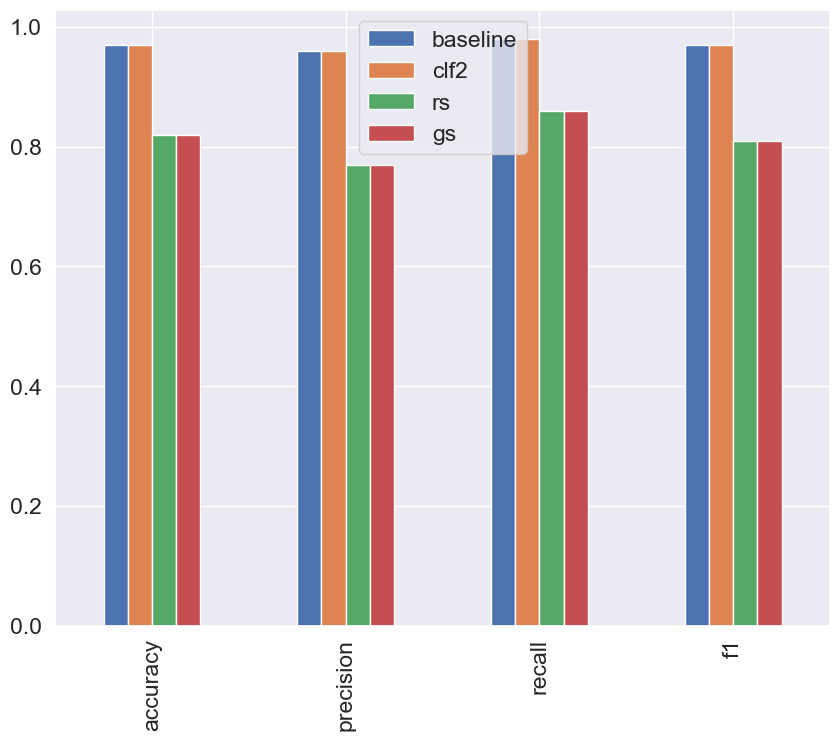

In [169]:
comparemetrics = pd.DataFrame({"baseline":baseline_metrics ,
                               "clf2" : sec_metrics,
                               "rs" :rs_metrics,
                               "gs" : gs_metrics})

comparemetrics.plot.bar(figsize = (10,8))

## Save and load a model

#### ways:

 - pickle module
 - joblib module

In [170]:
import pickle

# save an existing model

pickle.dump(clf3,open("randomforestwith2hyperparam.pkl","wb"))

In [171]:
#load saved model

loaded_pickle = pickle.load(open("randomforestwith2hyperparam.pkl","rb"))

In [172]:
y_preds = loaded_pickle.predict(x_test)
evaluate(y_test , y_preds)

 Acc: 91.80 %
 pre: 0.90 
 recall: 0.93 
 f1: 0.91


{'accuracy': 0.92, 'precision': 0.9, 'recall': 0.93, 'f1': 0.91}

In [173]:
# using joblib

from joblib import dump,load

dump(gs_clf , filename="gsrandom.joblib")

['gsrandom.joblib']

In [175]:
loaded = load(filename = "gsrandom.joblib")
y_preds = loaded.predict(x_test)
evaluate(y_test , y_preds)

 Acc: 81.97 %
 pre: 0.77 
 recall: 0.86 
 f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [176]:
# joblib more better for big models

In [177]:
from sklearn.pipeline import Pipeline

data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [178]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.read_csv("car-sales-extended-missing-data.csv")

data.dropna(subset=["Price"],inplace = True)

categorical_features = ["Make" , "Colour"]
categorical_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = "constant" , fill_value="missing")),
    ("onehoy" , OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = "constant" , fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = "mean" ))])


preprocessor = ColumnTransformer([
                ("cat" , categorical_transformer , categorical_features),
                ("door" , door_transformer , door_feature),
                ("num" , numeric_transformer , numeric_features)])

# creating a preprocessing and modelling pipeline

model = Pipeline(steps = [("preprocessor" , preprocessor),
                          ("model", RandomForestRegressor())])

x = data.drop("Price" , axis = 1)
y=data["Price"]
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)

model.fit(x_train , y_train)
model.score(x_test , y_test)

0.22188417408787875

In [183]:
#using gridsearchcv
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" : ["mean","median"], #try imputation strategy of mean and median
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["sqrt"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model ,pipe_grid , cv=5 , verbose =2)
gs_model.fit(x_train , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehoy',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [184]:
gs_model.score(x_test , y_test)

0.2848784564026805